In [12]:
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

In [8]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap= "gray")
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap= "gray")
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

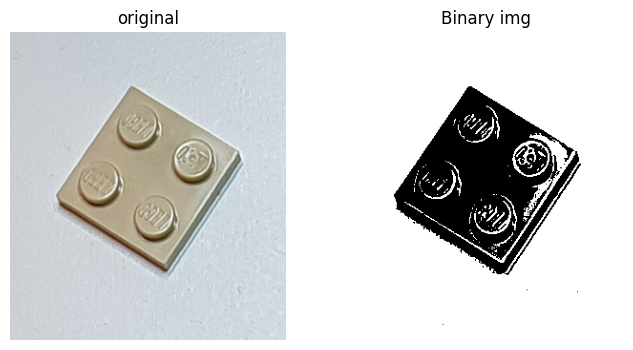

In [9]:
file_path = "data/lego_5.png"
img = io.imread(file_path)
img_gray = color.rgb2gray(img)
img_bin = img_gray > threshold_otsu(img_gray)
plot_comparison(img, img_bin, "Binary img")

In [16]:
footprint = disk(2)

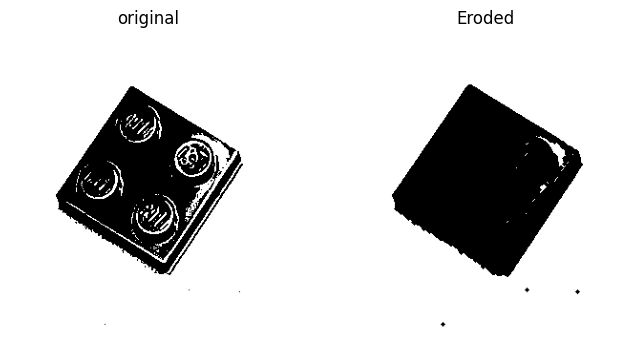

In [17]:
# Use Erosion to remove small objects, separate objects and make objects smaller
eroded = erosion(img_bin, footprint)
plot_comparison(img_bin, eroded, "Eroded")

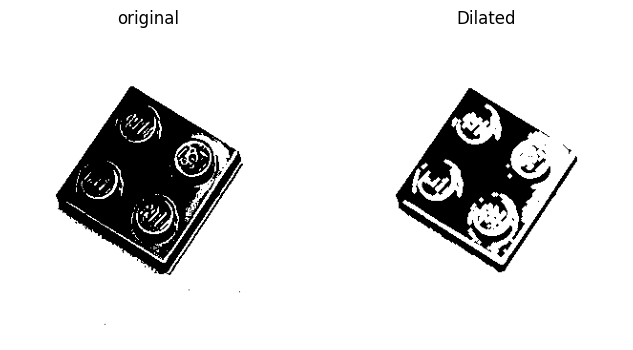

In [18]:
# Use Dilation to make objects larger, close holes and connect objects
dilated = dilation(img_bin, footprint)
plot_comparison(img_bin, dilated, "Dilated")

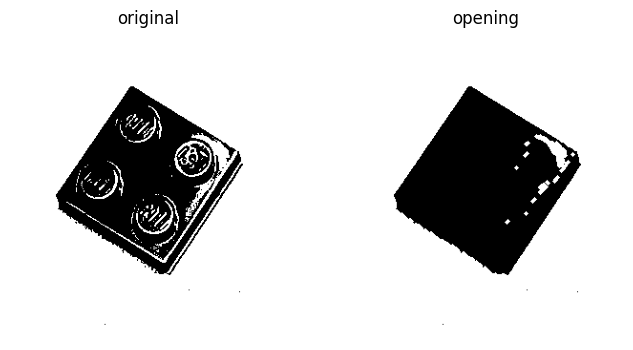

In [19]:
# Use opening to remove small objects without changing the size of the remaining objects.
opening = opening(img_bin, footprint)
plot_comparison(img_bin, opening, "opening")

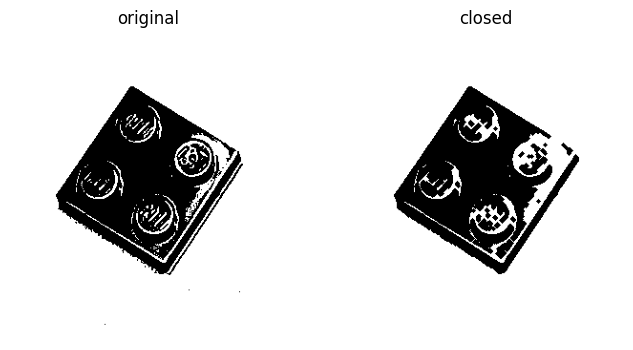

In [20]:
# Use closing to close holes in objects without changing the size of the remaining objects.
closed = closing(img_bin, footprint)
plot_comparison(img_bin, closed, "closed")

In [21]:
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline

In [23]:
img_outline = io.imread(compute_outline(img_bin))
io.imshow(img_outline)

OSError: Cannot understand given URI: array([[False, False, False, ..., False, False, False],
 ....